In-class exercise 2.3
UW AMATH 301 - Jakob Kotas

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

Optimization terminated successfully.
         Current function value: -8.596457
         Iterations: 11
         Function evaluations: 22
Optimization terminated successfully.
         Current function value: -9.805956
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: -9.992862
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: -9.994555
         Iterations: 10
         Function evaluations: 20
Optimization terminated successfully.
         Current function value: -9.998354
         Iterations: 11
         Function evaluations: 22
Optimization terminated successfully.
         Current function value: -9.999764
         Iterations: 8
         Function evaluations: 16
Optimization terminated successfully.
         Current function value: -9.999969
         Iterations: 13
         Function evaluations: 26
Optimization terminated succ

(0.0, 3.0, -3.0, 1.0)

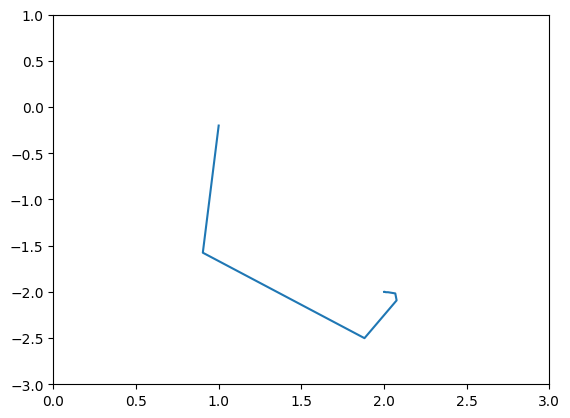

In [3]:
#Kutz code for gradient descent

# define optimization
def tausearch(tau):
    x0 = x - tau*(3*x + 2*y - 2)
    y0 = y - tau*(2*x + 6*y + 8)
    mintau = (3/2)*x0*x0+2*x0*y0+3*y0*y0-2*x0+8*y0
    return mintau

x = 1     # initial guesses for x and y
y = -0.2
f = (3/2)*x*x+2*x*y+3*y*y-2*x+8*y

# track values
xval = np.array(x)
yval = np.array(y)


for j in range(0,100):

    tau = optimize.fmin(tausearch,0.2)

    x = x - tau*(3*x + 2*y - 2)
    y = y - tau*(2*x + 6*y + 8)
    fold = f
    f = (3/2)*x*x+2*x*y+3*y*y-2*x+8*y

    xval = np.append(xval, x)
    yval = np.append(yval, y)

    if abs(f-fold) < 1e-5:
        break

print(x)
print(y)

plt.plot(xval,yval)
plt.axis([0, 3, -3, 1])

In [32]:
#2,3

def f(x1,x2):
    return 3/2*x1**2+2*x1*x2+3*x2**2-2*x1+8*x2  #(1)
#    return x1**2+x1*x2+x2**2/2-7*x1-2*x2 #(2)
#    return 3*x1**2/2-2*x1*x2+x2**2/2-11*x1+6*x2 #(3a) -- A not PSD, quadratic form saddle
#    return 3*x1**2/2+x2**2/2+12*x1+x2 #(3b) -- A not symmetric

def dfdx1(x1,x2):
    return 3*x1 + 2*x2 - 2 #(1)
#    return 2*x1+x2-7 #(2)
#    return 3*x1-2*x2-11 #(3a)
#    return 3*x1+12 #(3b)

def dfdx2(x1,x2):
    return 2*x1 + 6*x2 + 8 #(1)
#    return x1+x2-2 #(2)
#    return -2*x1+x2+6 #(3a)
#    return x2+1 #(3b)

def tausearch(tau):
    x1n = x1 - tau*dfdx1(x1,x2)
    x2n = x2 - tau*dfdx2(x1,x2)
    return f(x1n,x2n)

x1 = 1     # initial guess
x2 = -0.2
fx1x2 = f(x1,x2)

print('(x1,x2)=(',x1,',',x2,'), f(x1,x2)=',fx1x2)

for j in range(1,101):
    tau = optimize.fmin(tausearch,0.2,disp=False)

    x1new = x1 - tau*dfdx1(x1,x2)
    x2new = x2 - tau*dfdx2(x1,x2)
    fx1x2new = f(x1new,x2new)

    print('(x1,x2)=(',x1new,',',x2new,'), f(x1,x2)=',fx1x2new)

    if abs(fx1x2new-fx1x2) < 1e-5:
        break

    x1 = x1new
    x2 = x2new
    fx1x2 = f(x1,x2)

print('iterations of gradient descent:',j)
A=np.array([[3,2],[2,6]]) #(1)
b=np.array([[2],[-8]]) #(1)
#A=np.array([[2,1],[1,1]]) #(2)
#b=np.array([[7],[2]]) #(2)
#A=np.array([[3,-2],[-2,1]]) #(3a)
#b=np.array([[11],[-6]]) #(3a)
#A=np.array([[3,-2],[2,1]]) #(3b)
#b=np.array([[-12],[-1]]) #(3b)
xauto = np.linalg.solve(A,b)
print('solution from np.linalg.solve: (x1,x2)=',xauto)

(x1,x2)=( 1 , -0.2 ), f(x1,x2)= -2.38
(x1,x2)=( [0.90409375] , [-1.606625] ), f(x1,x2)= [-8.59645681]
(x1,x2)=( [1.81499346] , [-1.6679731] ), f(x1,x2)= [-9.74078757]
(x1,x2)=( [1.79755651] , [-1.9273901] ), f(x1,x2)= [-9.95210716]
(x1,x2)=( [1.96572147] , [-1.93858837] ), f(x1,x2)= [-9.99113351]
(x1,x2)=( [1.96252501] , [-1.98655098] ), f(x1,x2)= [-9.99835881]
(x1,x2)=( [1.99366884] , [-1.98864266] ), f(x1,x2)= [-9.99969672]
(x1,x2)=( [1.99307374] , [-1.9975154] ), f(x1,x2)= [-9.99994394]
(x1,x2)=( [1.99882818] , [-1.99789943] ), f(x1,x2)= [-9.99998963]
(x1,x2)=( [1.99871852] , [-1.99954019] ), f(x1,x2)= [-9.99999808]
iterations of gradient descent: 9
solution from np.linalg.solve: (x1,x2)= [[ 2.]
 [-2.]]
